# Price Index Vs Performance/Total Return Index 

In [22]:
import pandas as pd 
import numpy as np 
import yfinance 
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')
yfinance.pdr_override()
plt.style.use('fivethirtyeight')

In [23]:
tickers = ['BFIN.jk', 'ADMF.jk', 'MFIN.jk', 'WOMF.jk', 'IMJS.jk']
lease = pd.DataFrame()
shares = {}

## Loop to get Closing Price & Adjusted Closing Price 

In [24]:
for ticker in tickers : 
    lease[ticker] = wb.get_data_yahoo(ticker, start = '2015-01-01', end = '2023-04-17')['Adj Close']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [25]:
lease_close = pd.DataFrame()
for ticker in tickers : 
    lease_close[ticker] = wb.get_data_yahoo(ticker, start = '2015-01-01', end = '2023-04-17')['Close']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [26]:
lease_close.head()

,BFIN.jk,ADMF.jk,MFIN.jk,WOMF.jk,IMJS.jk
Date,,,,,
2015-01-02,255.0,7175.0,497.5,189.574509,580.0
2015-01-05,240.0,7175.0,470.0,177.552719,575.0
2015-01-06,240.0,7125.0,470.0,189.574509,595.0
2015-01-07,240.0,7125.0,470.0,188.649750,580.0
2015-01-08,240.0,7125.0,470.0,188.649750,585.0


In [27]:
lease.head()

,BFIN.jk,ADMF.jk,MFIN.jk,WOMF.jk,IMJS.jk
Date,,,,,
2015-01-02,156.142944,3428.181152,326.710571,142.048630,565.342834
2015-01-05,155.366119,3428.181152,308.651184,133.040695,560.469238
2015-01-06,155.366119,3404.291504,308.651184,142.048630,579.963745
2015-01-07,155.366119,3404.291504,308.651184,141.355713,565.342834
2015-01-08,155.366119,3404.291504,308.651184,141.355713,570.216492


## Getting Total return of Adj Closing Price and Weight of Each Stocks From it's Closing Price

In [28]:
total_return = lease.pct_change().dropna()
total_return.head()

,BFIN.jk,ADMF.jk,MFIN.jk,WOMF.jk,IMJS.jk
Date,,,,,
2015-01-05,-0.004975,0.000000,-0.055276,-0.063414,-0.008621
2015-01-06,0.000000,-0.006969,0.000000,0.067708,0.034782
2015-01-07,0.000000,0.000000,0.000000,-0.004878,-0.025210
2015-01-08,0.000000,0.000000,0.000000,0.000000,0.008621
2015-01-09,0.000000,0.000000,0.000000,0.000000,0.000000


In [29]:
weight =  lease_close.div(lease_close.sum(axis = 1), axis = 0)

## Normalize Closing Price of Each Stock

In [30]:
norm_lease_close = lease_close / lease_close.iloc[0] * 100
norm_lease_close.head()

,BFIN.jk,ADMF.jk,MFIN.jk,WOMF.jk,IMJS.jk
Date,,,,,
2015-01-02,100.000000,100.000000,100.000000,100.000000,100.000000
2015-01-05,94.117647,100.000000,94.472362,93.658541,99.137931
2015-01-06,94.117647,99.303136,94.472362,100.000000,102.586207
2015-01-07,94.117647,99.303136,94.472362,99.512192,100.000000
2015-01-08,94.117647,99.303136,94.472362,99.512192,100.862069


## Creating PWI & Performance Column

In [42]:
norm_lease_close['PWI'] = norm_lease_close.sum(axis = 1) / norm_lease_close.sum(axis = 1)[0] * 100

In [32]:
norm_lease_close['PWI_perf'] = 100 

In [40]:
norm_lease_close.iloc[1:, -1] = total_return.mul(weight.shift().dropna()).sum(axis = 1).add(1).cumprod().mul(100)

In [43]:
norm_lease_close

,BFIN.jk,ADMF.jk,MFIN.jk,WOMF.jk,IMJS.jk,PWI,PWI_perf
Date,,,,,,,
2015-01-02,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
2015-01-05,94.117647,100.000000,94.472362,93.658541,99.137931,96.809110,99.473497
2015-01-06,94.117647,99.303136,94.472362,100.000000,102.586207,98.290643,99.266454
2015-01-07,94.117647,99.303136,94.472362,99.512192,100.000000,97.747622,99.083059
2015-01-08,94.117647,99.303136,94.472362,99.512192,100.862069,97.900929,99.140641
...,...,...,...,...,...,...,...
2023-04-10,535.294118,147.038328,391.959799,159.304119,60.344828,265.781537,300.817966
2023-04-11,535.294118,147.038328,381.909548,155.084142,63.448276,263.842338,300.352489
2023-04-12,531.372549,148.083624,383.919598,154.029148,66.206897,264.289184,302.198955


## Creating Summary of the Return

In [48]:
summary = norm_lease_close.pct_change().dropna().describe().T
summary

,count,mean,std,min,25%,50%,75%,max
BFIN.jk,2068.0,0.001182,0.028183,-0.180328,-0.009091,0.000000e+00,0.007874,0.222500
ADMF.jk,2068.0,0.000277,0.015478,-0.181818,-0.003587,0.000000e+00,0.004053,0.132316
MFIN.jk,2068.0,0.000925,0.023351,-0.148148,-0.005006,0.000000e+00,0.005814,0.203883
WOMF.jk,2068.0,0.000729,0.033280,-0.207071,-0.010230,0.000000e+00,0.008475,0.346939
IMJS.jk,2068.0,0.000479,0.038116,-0.248739,-0.014787,0.000000e+00,0.007421,0.379310
PWI,2068.0,0.000642,0.019095,-0.294151,-0.005939,0.000000e+00,0.006481,0.388628
PWI_perf,2068.0,0.000621,0.012915,-0.146990,-0.003646,2.043919e-09,0.005016,0.111167


### Annualizing the mean and the std 

In [49]:
summary['mean'] = summary['mean'] * 250
summary['std'] = summary['std'] * 250**0.5

In [51]:
summary = summary[['mean', 'std']]

In [52]:
summary

,mean,std
BFIN.jk,0.295502,0.445609
ADMF.jk,0.069260,0.244736
MFIN.jk,0.231187,0.369214
WOMF.jk,0.182175,0.526205
IMJS.jk,0.119802,0.602667
PWI,0.160592,0.301915
PWI_perf,0.155223,0.204204


## Visualizing Price Vs Total Performance Return 

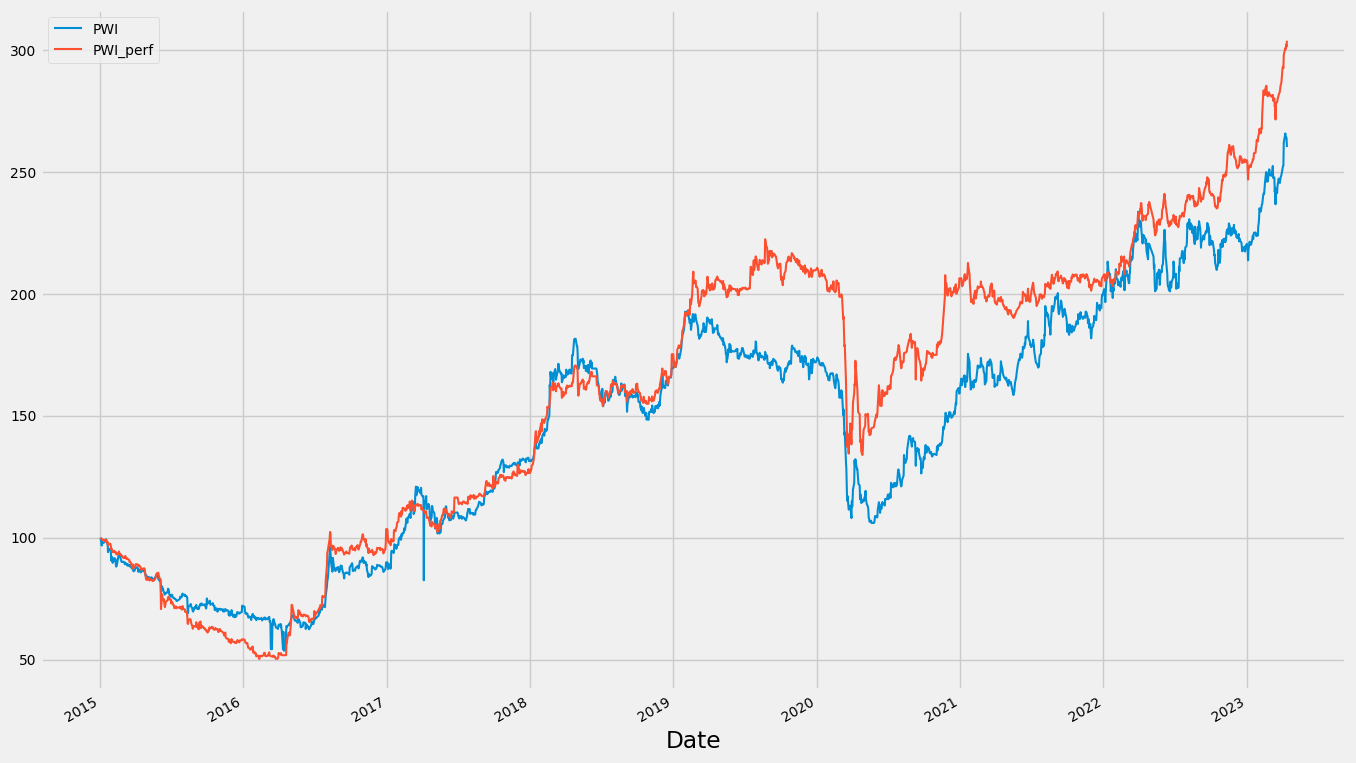

In [54]:
norm_lease_close.iloc[:, -2:].plot(figsize = (15,10), linewidth = 1.5, fontsize = 10)
plt.legend(fontsize = 10)
plt.show()